TASK 1: Load and Inspect the Data

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:


df = pd.read_csv("heart.csv")
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [10]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [12]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


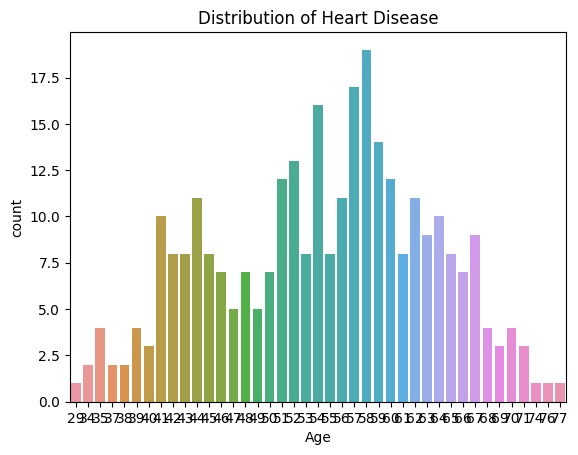

In [17]:


sns.countplot(x=df["Age"])
plt.title("Distribution of Heart Disease")
plt.show()

Task 2: Data Cleaning and Preprocessing (25-30 minutes)

Handle missing values using:

In [18]:
print(df.isnull().sum())  # Check missing values
df.fillna(df.mean(), inplace=True)  # Fill missing values with column mean

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


Convert categorical variables into numeric format using one-hot encoding:

In [33]:
import pandas as pd
required_columns = ['ChestPain', 'RestECG', 'Thal']

df.columns = df.columns.str.strip()  
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {', '.join(missing_columns)}")
else:
    df = pd.get_dummies(df, columns=required_columns, drop_first=True) 
(df)

Missing columns: ChestPain, RestECG, Thal


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,RestECG_1,RestECG_2,Thal_normal,Thal_reversable
0,1,63,1,145,233,1,150,0,2.3,3,0.000000,No,0,0,1,0,1,0,0
1,2,67,1,160,286,0,108,1,1.5,2,3.000000,Yes,0,0,0,0,1,1,0
2,3,67,1,120,229,0,129,1,2.6,2,2.000000,Yes,0,0,0,0,1,0,1
3,4,37,1,130,250,0,187,0,3.5,3,0.000000,No,1,0,0,0,0,1,0
4,5,41,0,130,204,0,172,0,1.4,1,0.000000,No,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,110,264,0,132,0,1.2,2,0.000000,Yes,0,0,1,0,0,0,1
299,300,68,1,144,193,1,141,0,3.4,2,2.000000,Yes,0,0,0,0,0,0,1
300,301,57,1,130,131,0,115,1,1.2,2,1.000000,Yes,0,0,0,0,0,0,1
301,302,57,0,130,236,0,174,0,0.0,2,1.000000,Yes,0,1,0,0,1,1,0


Feature Engineering:

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["RestBP", "Chol", "MaxHR"]] = scaler.fit_transform(df[["RestBP", "Chol", "MaxHR"]])
df

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,RestECG_1,RestECG_2,Thal_normal,Thal_reversable
0,1,63,1,0.757525,-0.264900,1,0.017197,0,2.3,3,0.000000,No,0,0,1,0,1,0,0
1,2,67,1,1.611220,0.760415,0,-1.821905,1,1.5,2,3.000000,Yes,0,0,0,0,1,1,0
2,3,67,1,-0.665300,-0.342283,0,-0.902354,1,2.6,2,2.000000,Yes,0,0,0,0,1,0,1
3,4,37,1,-0.096170,0.063974,0,1.637359,0,3.5,3,0.000000,No,1,0,0,0,0,1,0
4,5,41,0,-0.096170,-0.825922,0,0.980537,0,1.4,1,0.000000,No,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,-1.234430,0.334813,0,-0.770990,0,1.2,2,0.000000,Yes,0,0,1,0,0,0,1
299,300,68,1,0.700612,-1.038723,1,-0.376896,0,3.4,2,2.000000,Yes,0,0,0,0,0,0,1
300,301,57,1,-0.096170,-2.238149,0,-1.515388,1,1.2,2,1.000000,Yes,0,0,0,0,0,0,1
301,302,57,0,-0.096170,-0.206864,0,1.068113,0,0.0,2,1.000000,Yes,0,1,0,0,1,1,0


Task 3: Exploratory Data Analysis (EDA)

Univariate Analysis:

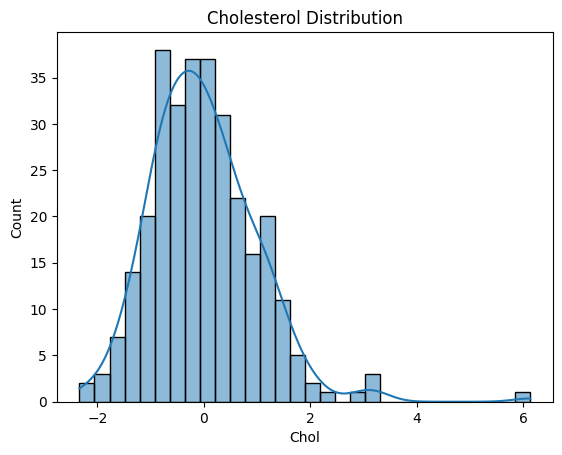

In [37]:
sns.histplot(df["Chol"], bins=30, kde=True)
plt.title("Cholesterol Distribution")
plt.show()

Bivariate Analysis:

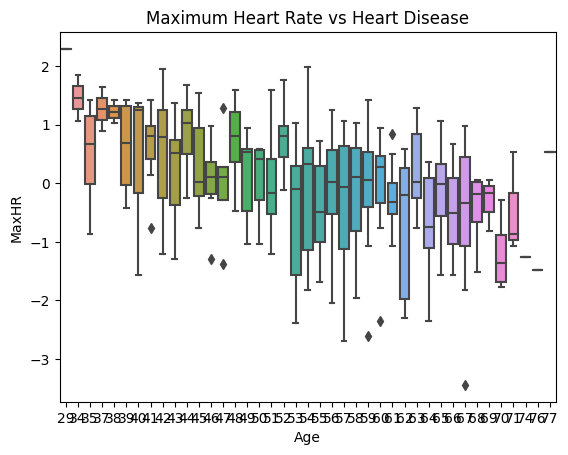

In [38]:
sns.boxplot(x=df["Age"], y=df["MaxHR"])
plt.title("Maximum Heart Rate vs Heart Disease")
plt.show()


Visualizing correlations

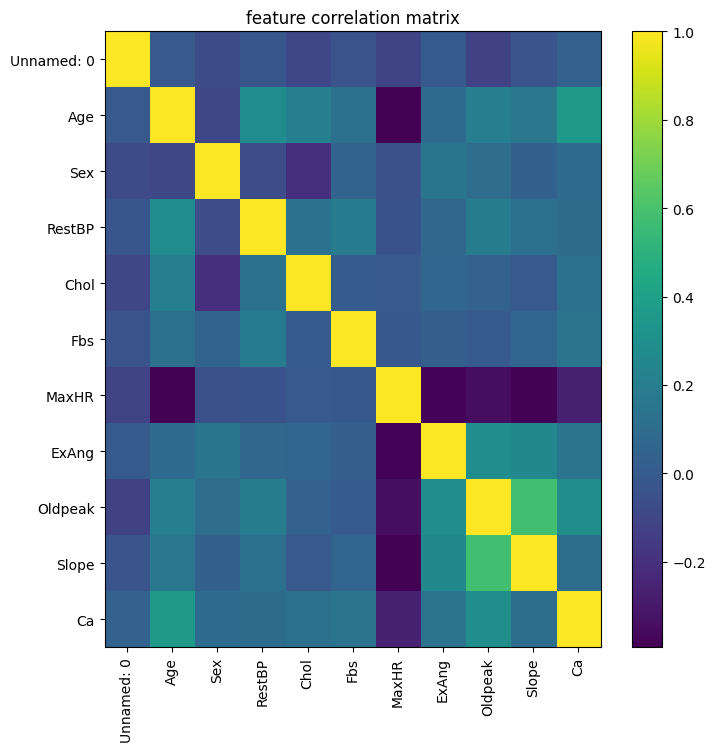

In [45]:
corr = df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(8,8))
plt.imshow(corr, interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('feature correlation matrix')
plt.show()

Task 4: Aggregation and Insights (20 minutes)

<AxesSubplot:xlabel='Sex'>

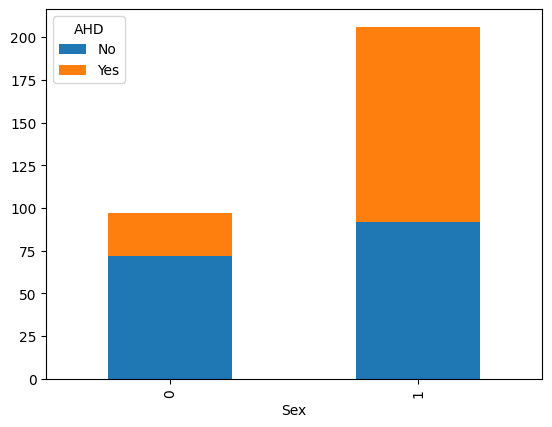

In [46]:
pd.crosstab(df['Sex'], df['AHD']).plot(kind='bar', stacked=True)



In [47]:
df['AHD_num'] = df['AHD'].map({'No': 0, 'Yes': 1})

In [48]:

print('survival rate by sex:')
print(df.groupby('Sex')['AHD_num'].mean())


survival rate by sex:
Sex
0    0.257732
1    0.553398
Name: AHD_num, dtype: float64


In [49]:
# 2. survival rate by chest pain type
print('\nsurvival rate by chest pain type:')
print(df.groupby('ChestPain_typical')['AHD_num'].mean())


survival rate by chest pain type:
ChestPain_typical
0    0.471429
1    0.304348
Name: AHD_num, dtype: float64


In [50]:
# 3. categorize max heart rate into low/high based on median
med_hr = df['MaxHR'].median()
df['hr_level'] = df['MaxHR'].apply(lambda x: 'low' if x < med_hr else 'high')
print('\nsurvival rate by maxhr level:')
print(df.groupby('hr_level')['AHD_num'].mean())


survival rate by maxhr level:
hr_level
high    0.282895
low     0.635762
Name: AHD_num, dtype: float64


In [51]:
# 4. average cholesterol by disease status
print('\navg cholesterol by disease:')
print(df.groupby('AHD')['Chol'].mean())


avg cholesterol by disease:
AHD
No    -0.078404
Yes    0.092506
Name: Chol, dtype: float64


In [52]:
# 5. average cholesterol by chest pain & disease status
print('\navg chol by chest pain & disease:')
print(df.groupby(['ChestPain_typical','AHD'])['Chol'].mean().unstack())


avg chol by chest pain & disease:
AHD                      No       Yes
ChestPain_typical                    
0                 -0.051707  0.090208
1                 -0.325355  0.135829


Task 5: Derive Medical Insights

In [53]:
df.groupby('Sex')['AHD_num'].mean()

Sex
0    0.257732
1    0.553398
Name: AHD_num, dtype: float64

In [54]:
df.groupby('ChestPain_typical')['AHD_num'].mean()

ChestPain_typical
0    0.471429
1    0.304348
Name: AHD_num, dtype: float64

In [55]:

med_hr = df['MaxHR'].median()
df['hr_level'] = df['MaxHR'].apply(lambda x: 'low' if x<med_hr else 'high')
df.groupby('hr_level')['AHD_num'].mean()

hr_level
high    0.282895
low     0.635762
Name: AHD_num, dtype: float64

In [56]:
df.groupby('AHD')['Chol'].mean()

AHD
No    -0.078404
Yes    0.092506
Name: Chol, dtype: float64

<AxesSubplot:xlabel='ExAng'>

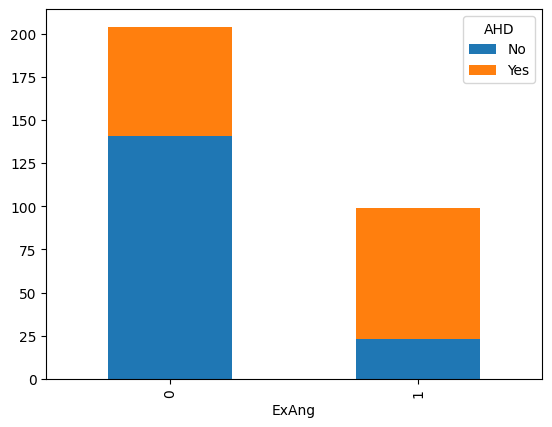

In [57]:
pd.crosstab(df['ExAng'], df['AHD']).plot(kind='bar', stacked=True)

In [58]:
# numeric target and hr level
df['AHD_num'] = df['AHD'].map({'No': 0, 'Yes': 1})
med_hr = df['MaxHR'].median()
df['hr_level'] = df['MaxHR'].apply(lambda x: 'low' if x < med_hr else 'high')

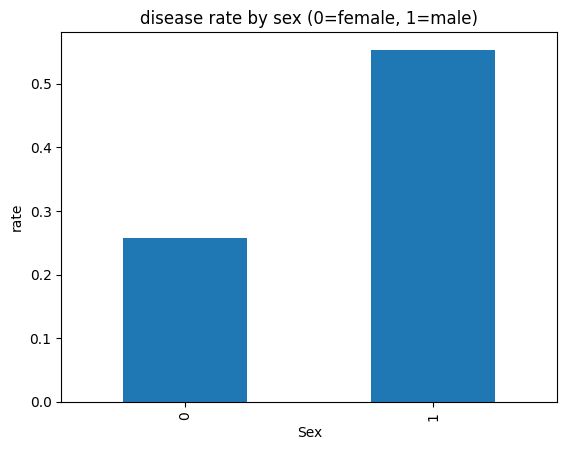

In [59]:
# chart 1: disease rate by sex
plt.figure()
df.groupby('Sex')['AHD_num'].mean().plot(kind='bar')
plt.title('disease rate by sex (0=female, 1=male)')
plt.ylabel('rate')
plt.show()

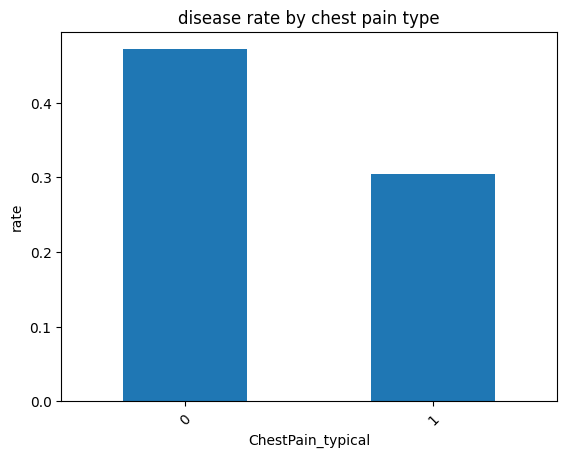

In [60]:
# chart 2: disease rate by chest pain
plt.figure()
df.groupby('ChestPain_typical')['AHD_num'].mean().plot(kind='bar')
plt.title('disease rate by chest pain type')
plt.ylabel('rate')
plt.xticks(rotation=45)
plt.show()

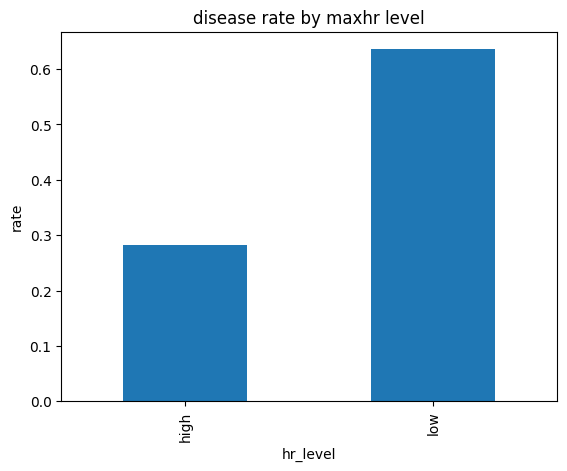

In [61]:
# chart 3: disease rate by maxhr level
plt.figure()
df.groupby('hr_level')['AHD_num'].mean().plot(kind='bar')
plt.title('disease rate by maxhr level')
plt.ylabel('rate')
plt.show()

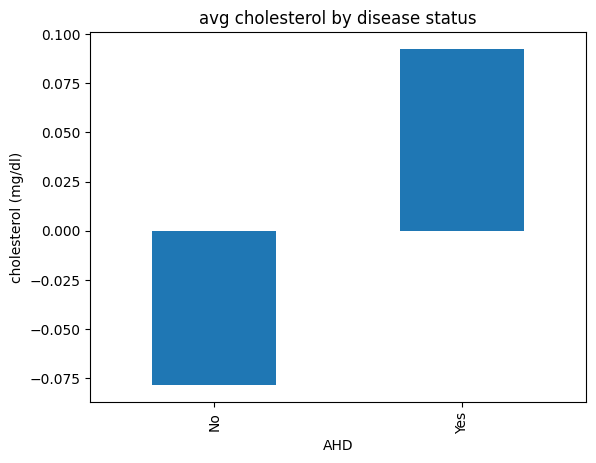

In [62]:
# chart 4: avg cholesterol by disease status
plt.figure()
df.groupby('AHD')['Chol'].mean().plot(kind='bar')
plt.title('avg cholesterol by disease status')
plt.ylabel('cholesterol (mg/dl)')
plt.show()

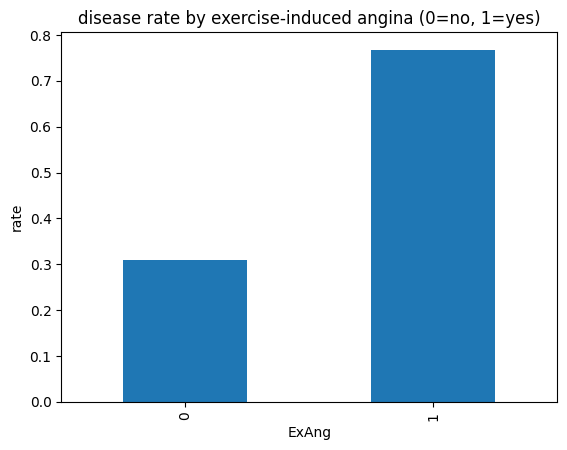

In [63]:
# chart 5: disease rate by exercise angina
plt.figure()
df.groupby('ExAng')['AHD_num'].mean().plot(kind='bar')
plt.title('disease rate by exercise-induced angina (0=no, 1=yes)')
plt.ylabel('rate')
plt.show()